In [1]:
### EDIT STUFF HERE PER NOTEBOOK

freq = "434829270x" # <-- CHANGE THIS FREQ TO MATCH YOUR NOTEBOOK
t0 = 0
t1 = 1.2
t2 = 2.5
t3 = 2.8
t4 = 5
t5 = 6.2
t6 = 7.5
t7 = 8.7
t8 = 9.69

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file from row 4 onwards
df = pd.read_csv('../'+freq+'.csv', skiprows=3)

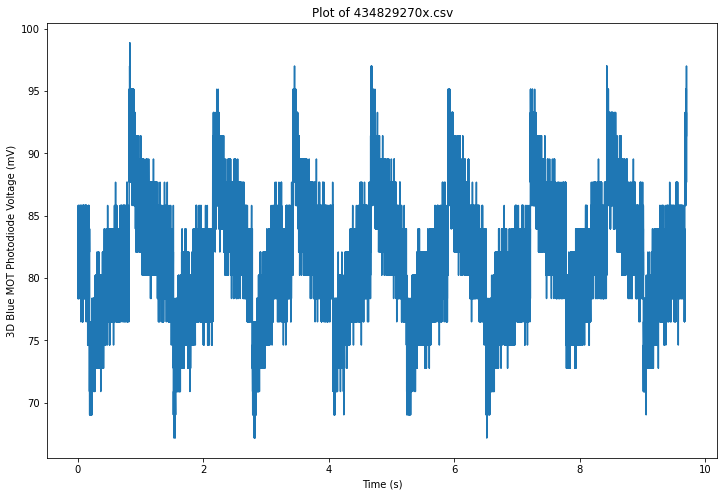

In [3]:
# Plot the data
plt.figure(figsize=(12,8))
plt.plot(df.iloc[:,0], df.iloc[:,1])
plt.xlabel('Time (s)')
plt.ylabel('3D Blue MOT Photodiode Voltage (mV)')
plt.title('Plot of '+freq+'.csv')
plt.show()


### Write some function to find extremas i.e. peak and dips for a given slice of time (note: shelving was manual human so the time steps is not constant --> need to select time slices manually)

In [4]:
# Find a function to find the global minima and maxima in the dataset

def find_global_extrema(dataset, start_time, end_time):
    
    # Find the sampling time
    dt = dataset.iloc[1,0] - dataset.iloc[0,0]
    
    # Find the index of the start and end time
    start_index = int(start_time/dt)
    end_index = int(end_time/dt)

    # Find the index of the global minima
    min_index = np.argmin(dataset.iloc[start_index:end_index, 1])
    max_index = np.argmax(dataset.iloc[start_index:end_index, 1])

    # Get the corresponding time and voltage values
    min_time = dataset.iloc[start_index+min_index, 0]
    min_voltage = dataset.iloc[start_index+min_index, 1]

    max_time = dataset.iloc[start_index+max_index, 0]
    max_voltage = dataset.iloc[start_index+max_index, 1]

    return (min_time, min_voltage), (max_time, max_voltage)

### Now that I have already sanity checked that the function above works, now we get all the peaks and dips and plot them out to double check.

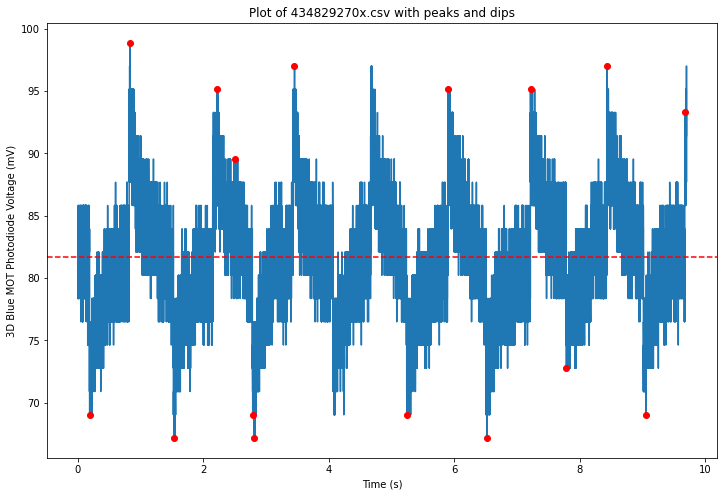

In [5]:
# Find the average voltage of the data
average_MOT_voltage = np.average(df.iloc[:,1])

# Find all the peaks and dips by slicing across the data

dip1, peak1 = find_global_extrema(df, t0, t1)
dip2, peak2 = find_global_extrema(df, t1, t2)
dip3, peak3 = find_global_extrema(df, t2, t3)
dip4, peak4 = find_global_extrema(df, t3, t4)
dip5, peak5 = find_global_extrema(df, t4, t5)
dip6, peak6 = find_global_extrema(df, t5, t6)
dip7, peak7 = find_global_extrema(df, t6, t7)
dip8, peak8 = find_global_extrema(df, t7, t8)

# Plot the peaks and dips and the average voltage as a horizontal line
plt.figure(figsize=(12,8))
plt.plot(df.iloc[:,0], df.iloc[:,1])
plt.plot(peak1[0], peak1[1], 'ro')
plt.plot(dip1[0], dip1[1], 'ro')
plt.plot(peak2[0], peak2[1], 'ro')
plt.plot(dip2[0], dip2[1], 'ro')
plt.plot(peak3[0], peak3[1], 'ro')
plt.plot(dip3[0], dip3[1], 'ro')
plt.plot(peak4[0], peak4[1], 'ro')
plt.plot(dip4[0], dip4[1], 'ro')
plt.plot(peak5[0], peak5[1], 'ro')
plt.plot(dip5[0], dip5[1], 'ro')
plt.plot(peak6[0], peak6[1], 'ro')
plt.plot(dip6[0], dip6[1], 'ro')
plt.plot(peak7[0], peak7[1], 'ro')
plt.plot(dip7[0], dip7[1], 'ro')
plt.plot(peak8[0], peak8[1], 'ro')
plt.plot(dip8[0], dip8[1], 'ro')
plt.axhline(y=average_MOT_voltage, color='r', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('3D Blue MOT Photodiode Voltage (mV)')
plt.title('Plot of '+freq+'.csv with peaks and dips')
plt.show()

### Nice! This works. Now investigate shelving signal. Look at the change in voltage between the dip/peak and the average value. This allows us to eventually obtain one/two data point in our eventual final plot of shelving vs frequency. This is for just ONE frequency point.

In [6]:
# Find the average voltage of the data
average_MOT_voltage = np.average(df.iloc[:,1])

# Put all peaks into one array
peaks = np.array([peak1[1], peak2[1], peak3[1], peak4[1], peak5[1], peak6[1], peak7[1], peak8[1]])
# Put all dips into one array
dips = np.array([dip1[1], dip2[1], dip3[1], dip4[1], dip5[1], dip6[1], dip7[1], dip8[1]])

peaks_shelving_signal = peaks - average_MOT_voltage
dips_shelving_signal = dips - average_MOT_voltage

print("The shelving signal for the peaks is: ", peaks_shelving_signal)
print("The normalised average shelving signal for the peaks is: \n", np.average(peaks_shelving_signal)/average_MOT_voltage)
print("The normalised standard deviation of the shelving signal for the peaks is: \n", np.std(peaks_shelving_signal)/average_MOT_voltage)

print("\n\nThe shelving signal for the dips is: ", dips_shelving_signal)
print("The normalised average shelving signal for the dips is: \n", -np.average(dips_shelving_signal)/average_MOT_voltage)
print("The normalised standard deviation of the shelving signal for the dips is: \n", np.std(dips_shelving_signal)/average_MOT_voltage)

The shelving signal for the peaks is:  [17.19515585 13.46114585  7.86320585 15.32506585 13.46114585 13.46114585
 15.32506585 11.59721585]
The normalised average shelving signal for the peaks is: 
 0.16480522756897206
The normalised standard deviation of the shelving signal for the peaks is: 
 0.03230583489347687


The shelving signal for the dips is:  [-12.65844415 -14.52236415 -12.65844415 -14.52236415 -12.65844415
 -14.52236415  -8.92443415 -12.65844415]
The normalised average shelving signal for the dips is: 
 0.1578208164287031
The normalised standard deviation of the shelving signal for the dips is: 
 0.021176386839353308
